# PA 3: Association Analysis - Apriori Algorithm

## Student Details

Student Name: Angad Tarikere Manjunatha


Student ID:1001718335

Team member name and ID:

Karthik Natarajan-1001872904


Rishitha Patel-1001863136



## Submission Instructions


Step 1: Create a folder and name it 'lastname_firstname_yourNetID_PA3'

Step 2: Rename this submission file as 'lastname_firstname_yourNetID_PA3.ipynb' and place it inside the folder 'lastname_firstname_yourNetID_PA3'

Step 3: Rename the updated dataset file 'dataset.csv' and place it inside the folder 'lastname_firstname_yourNetID_PA3'  

Step 4: Your submission folder should include ONLY the following files:
    * apriory.py,
    * lastname_firstname_yourNetID_PA4.ipynb, 
    * dataset.csv,
    * toyDS.csv

Step 5: Zip this folder and submit it on BB. Your final submission folder name should be 'lastname_firstname_yourNetID_PA3.ZIP'


## Programming Assignment Details

Before you start:
- Be familiar with the algorithm and with the dataset.
- If you use external sources make sure that you cite them, and be specific! 
- Make sure that your code is running before you upload your submission file. TA will not debug your code.
- Start early!


For this assignment, you will have to use:
* Jupyter notebook, 
* the 'Random Shopping cart' dataset [01],
* and the Apriori Algorithm (apriory.py)[02]. Note that the apriory.py file is modified to run with Python 3.

## - - - - - - - - - - - - - - - - - - - - - - - SOLUTION - - - - - - - - - - - - - - - - - - - - - - -

In [24]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [37]:
# Import your Libraries
import pandas as pd
import csv
import numpy as np
import argparse
from optparse import OptionParser
from itertools import chain, combinations
from collections import defaultdict
from IPython.display import Image

In [26]:
# Reading the csv file into a dataframe
store = pd.read_csv('Market_Basket_Optimisation.csv', header=None)

In [27]:
# store.head(8) prints the first 7 rows in the dataframe
store.head(7)

0             1           2                 3   \
0             shrimp       almonds     avocado    vegetables mix   
1            burgers     meatballs        eggs               NaN   
2            chutney           NaN         NaN               NaN   
3             turkey       avocado         NaN               NaN   
4      mineral water          milk  energy bar  whole wheat rice   
5     low fat yogurt           NaN         NaN               NaN   
6  whole wheat pasta  french fries         NaN               NaN   

             4                 5     6               7             8   \
0  green grapes  whole weat flour  yams  cottage cheese  energy drink   
1           NaN               NaN   NaN             NaN           NaN   
2           NaN               NaN   NaN             NaN           NaN   
3           NaN               NaN   NaN             NaN           NaN   
4     green tea               NaN   NaN             NaN           NaN   
5           NaN               NaN   NaN             NaN           NaN   
6           NaN               NaN   NaN             NaN           NaN   

             9               10         11     12     13             14  \
0  tomato juice  low fat yogurt  green tea  honey  salad  mineral water   
1           NaN             NaN        NaN    NaN    NaN            NaN   
2           NaN             NaN        NaN    NaN    NaN            NaN   
3           NaN             NaN        NaN    NaN    NaN            NaN   
4           NaN             NaN        NaN    NaN    NaN            NaN   
5           NaN             NaN        NaN    NaN    NaN            NaN   
6           NaN             NaN        NaN    NaN    NaN            NaN   

       15                 16               17       18         19  
0  salmon  antioxydant juice  frozen smoothie  spinach  olive oil  
1     NaN                NaN              NaN      NaN        NaN  
2     NaN                NaN              NaN      NaN        NaN  
3     NaN                NaN              NaN      NaN        NaN  
4     NaN                NaN              NaN      NaN        NaN  
5     NaN                NaN              NaN      NaN        NaN  
6     NaN                NaN              NaN      NaN        NaN

In [28]:
# Here we are filling the null values with blankspace using store.fillna("")
store_data=store.fillna("")
print(store_data)

                 0                  1            2                 3   \
0            shrimp            almonds      avocado    vegetables mix   
1           burgers          meatballs         eggs                     
2           chutney                                                     
3            turkey            avocado                                  
4     mineral water               milk   energy bar  whole wheat rice   
...             ...                ...          ...               ...   
7496         butter         light mayo  fresh bread                     
7497        burgers  frozen vegetables         eggs      french fries   
7498        chicken                                                     
7499       escalope          green tea                                  
7500           eggs    frozen smoothie  yogurt cake    low fat yogurt   

                4                 5     6               7             8   \
0     green grapes  whole weat flour  yams  cot

In [29]:
# In this cell we are storing the dataframe values in the form of lists of lists
records = []
for i in range(0, 7501):
    records.append([str(store_data.values[i,j]) 
    for j in range(0, 20)])
records = np.array(records)    
print(records.shape)   


(7501, 20)


In [30]:
# Here  we are removing all the blankspaces/empty strings in lists of lists
data=[[string for string in sublist if string] for sublist in records]
print(data)

[['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes', 'whole weat flour', 'yams', 'cottage cheese', 'energy drink', 'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad', 'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie', 'spinach', 'olive oil'], ['burgers', 'meatballs', 'eggs'], ['chutney'], ['turkey', 'avocado'], ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'], ['low fat yogurt'], ['whole wheat pasta', 'french fries'], ['soup', 'light cream', 'shallot'], ['frozen vegetables', 'spaghetti', 'green tea'], ['french fries'], ['eggs', 'pet food'], ['cookies'], ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'], ['spaghetti', 'champagne', 'cookies'], ['mineral water', 'salmon'], ['mineral water'], ['shrimp', 'chocolate', 'chicken', 'honey', 'oil', 'cooking oil', 'low fat yogurt'], ['turkey', 'eggs'], ['turkey', 'fresh tuna', 'tomatoes', 'spaghetti', 'mineral water', 'black tea', 'salmon', 'eggs', 'chicken', 'extra d

In [31]:
# We are converting the  preprocessed dataframe into a csv file
df = pd.DataFrame(data)
df.to_csv (r'C:\Users\angad\OneDrive\Desktop\Manjunatha_Angad_8335_PA3\dataset.csv', index = False, header= False)

Screenshot of dataset.csv


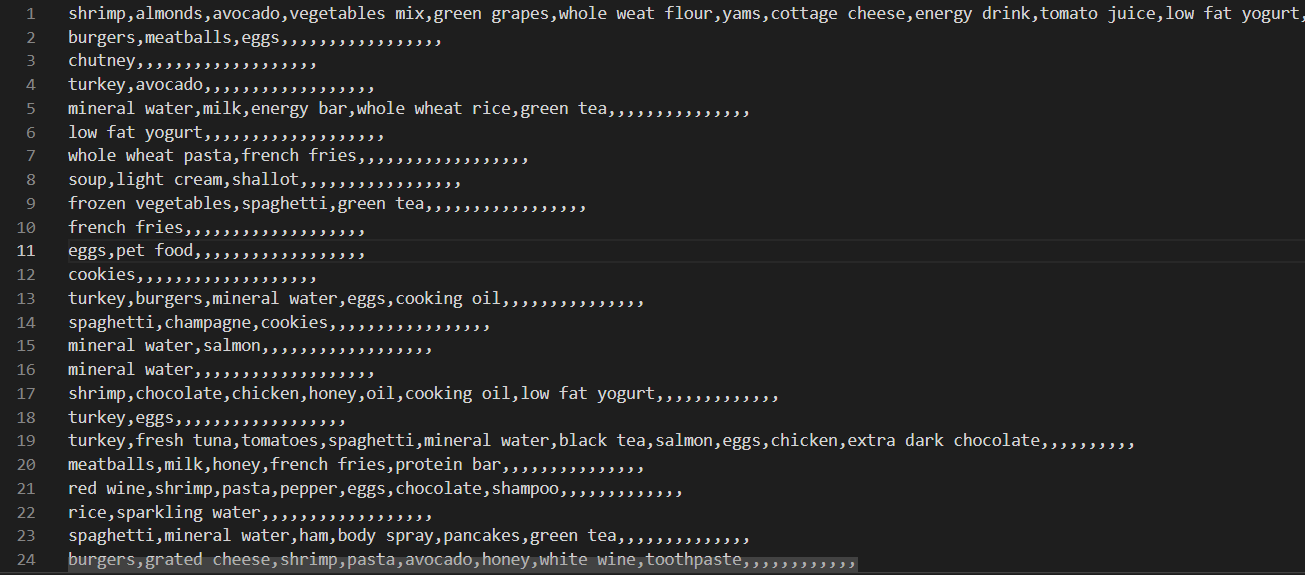

In [32]:
print("Screenshot of dataset.csv")
Image("dataset.png")

### Task 2: Run apriory.py and Evaluate Results 

In this task, you have to find how you will be able to execute and print apriory results by making use only the apriory.py. In other words "DO NOT USE ANY OTHER LIBRARY FOR TASK 2!!!". 

(*) For those that are not familiar with python and coding this could be a quite demanding task.


You will have to execute apriori algorithm "3" times for different combinations of support and confidence.
Print the results of apriory for 'dataset.csv' by making use ONLY the provided methods. 

Do not forget to add your reasoning (explain the result outcome) at the top of each case in a nice and readable way. 

You are allowed to use the python print method to print your results. DO NOT add your reasoning as comments. 


In [33]:
# This is the main apriori.py file
def subsets(arr):
    """ Returns non empty subsets of arr"""
    return chain(*[combinations(arr, i + 1) for i, a in enumerate(arr)])


def returnItemsWithMinSupport(itemSet, transactionList, minSupport, freqSet):
    """calculates the support for items in the itemSet and returns a subset
    of the itemSet each of whose elements satisfies the minimum support"""
    _itemSet = set()
    localSet = defaultdict(int)

    for item in itemSet:
        for transaction in transactionList:
            if item.issubset(transaction):
                freqSet[item] += 1
                localSet[item] += 1

    for item, count in localSet.items():
        support = float(count) / len(transactionList)

        if support >= minSupport:
            _itemSet.add(item)

    return _itemSet


def joinSet(itemSet, length):
    """Join a set with itself and returns the n-element itemsets"""
    return set(
        [i.union(j) for i in itemSet for j in itemSet if len(i.union(j)) == length]
    )


def getItemSetTransactionList(data_iterator):
    transactionList = list()
    itemSet = set()
    for record in data_iterator:
        transaction = frozenset(record)
        transactionList.append(transaction)
        for item in transaction:
            itemSet.add(frozenset([item]))  # Generate 1-itemSets
    return itemSet, transactionList


def runApriori(data_iter, minSupport, minConfidence):
    """
    run the apriori algorithm. data_iter is a record iterator
    Return both:
     - items (tuple, support)
     - rules ((pretuple, posttuple), confidence)
    """
    itemSet, transactionList = getItemSetTransactionList(data_iter)

    freqSet = defaultdict(int)
    largeSet = dict()
    # Global dictionary which stores (key=n-itemSets,value=support)
    # which satisfy minSupport

    assocRules = dict()
    # Dictionary which stores Association Rules

    oneCSet = returnItemsWithMinSupport(itemSet, transactionList, minSupport, freqSet)

    currentLSet = oneCSet
    k = 2
    while currentLSet != set([]):
        largeSet[k - 1] = currentLSet
        currentLSet = joinSet(currentLSet, k)
        currentCSet = returnItemsWithMinSupport(
            currentLSet, transactionList, minSupport, freqSet
        )
        currentLSet = currentCSet
        k = k + 1

    def getSupport(item):
        """local function which Returns the support of an item"""
        return float(freqSet[item]) / len(transactionList)

    toRetItems = []
    for key, value in largeSet.items():
        toRetItems.extend([(tuple(item), getSupport(item)) for item in value])

    toRetRules = []
    for key, value in list(largeSet.items())[1:]:
        for item in value:
            _subsets = map(frozenset, [x for x in subsets(item)])
            for element in _subsets:
                remain = item.difference(element)
                if len(remain) > 0:
                    confidence = getSupport(item) / getSupport(element)
                    if confidence >= minConfidence:
                        toRetRules.append(((tuple(element), tuple(remain)), confidence))
    return toRetItems, toRetRules


def printResults(items, rules):
    """prints the generated itemsets sorted by support and the confidence rules sorted by confidence"""
    for item, support in sorted(items, key=lambda x: x[1]):
        print("item: %s , %.3f" % (str(item), support))
    print("\n------------------------ RULES:")
    for rule, confidence in sorted(rules, key=lambda x: x[1]):
        pre, post = rule
        print("Rule: %s ==> %s , %.3f" % (str(pre), str(post), confidence))


def to_str_results(items, rules):
    """prints the generated itemsets sorted by support and the confidence rules sorted by confidence"""
    i, r = [], []
    for item, support in sorted(items, key=lambda x: x[1]):
        x = "item: %s , %.3f" % (str(item), support)
        i.append(x)

    for rule, confidence in sorted(rules, key=lambda x: x[1]):
        pre, post = rule
        x = "Rule: %s ==> %s , %.3f" % (str(pre), str(post), confidence)
        r.append(x)

    return i, r


def dataFromFile(fname):
    """Function which reads from the file and yields a generator"""
    with open(fname, "rU") as file_iter:
        for line in file_iter:
            line = line.strip().rstrip(",")  # Remove trailing comma
            record = frozenset(line.split(","))
            yield record


if __name__ == "__main__":

   

    
    items, rules = runApriori(data,0.045,0.3)

   

In [34]:
print ('# # # # # # # # #  Code for Task 2, Case:1 # # # # # # # # #') 
print ('Case 1 (minimum support=4.5% and minimum confidence=10%)')
items, rules = runApriori(data, 0.045, 0.3)
print ('Case 1 Reasoning:\nApriori depends up on two values- support and confidence \nsupport means in how many number of transaction a particular item is present out of all transactions\nand if the item qualifies for minimum support it goes to frequent items\nconfidence shows how two or more items dependent on each other')
print('\nIn this case: min-support is 4.5% and min-confidece is 10%')
print('The min-confidence is 10% which means that, in a x->y rule, if x item set is already in the basket, there is 10% min-chance that y item set is also added to the basket.')
print ('Case 1 Output:')
printResults(items,rules)

# # # # # # # # #  Code for Task 2, Case:1 # # # # # # # # #
Case 1 (minimum support=4.5% and minimum confidence=10%)
Case 1 Reasoning:
Apriori depends up on two values- support and confidence 
support means in how many number of transaction a particular item is present out of all transactions
and if the item qualifies for minimum support it goes to frequent items
confidence shows how two or more items dependent on each other

In this case: min-support is 4.5% and min-confidece is 10%
The min-confidence is 10% which means that, in a x->y rule, if x item set is already in the basket, there is 10% min-chance that y item set is also added to the basket.
Case 1 Output:
item: ('champagne',) , 0.047
item: ('honey',) , 0.047
item: ('mineral water', 'milk') , 0.048
item: ('herb & pepper',) , 0.049
item: ('soup',) , 0.051
item: ('mineral water', 'eggs') , 0.051
item: ('cooking oil',) , 0.051
item: ('grated cheese',) , 0.052
item: ('mineral water', 'chocolate') , 0.053
item: ('whole wheat rice',

In [35]:
print ('# # # # # # # # #  Code for Task 2, Case:2 # # # # # # # # #') 
print ('Case 2 (minimum support=4% and minimum confidence=15%)') 
items, rules = runApriori(data, 0.040, 0.15)
print ('Case 2 Reasoning:\nAs the minimum support is decreased compared to before case by which more number frequent items gets selected\nand as the confidence values increased the accuracy of the data increases')
print('The min-confidence is 15% which means that, in a x->y rule, if x item set is already in the basket then there is 15% min-chance that y item set is also added to the basket.\n')
print ('Case 2 Output:') 
printResults(items,rules)

# # # # # # # # #  Code for Task 2, Case:2 # # # # # # # # #
Case 2 (minimum support=4% and minimum confidence=15%)
Case 2 Reasoning:
As the minimum support is decreased compared to before case by which more number frequent items gets selected
and as the confidence values increased the accuracy of the data increases
The min-confidence is 15% which means that, in a x->y rule, if x item set is already in the basket then there is 15% min-chance that y item set is also added to the basket.

Case 2 Output:
item: ('mineral water', 'ground beef') , 0.041
item: ('salmon',) , 0.043
item: ('fresh bread',) , 0.043
item: ('champagne',) , 0.047
item: ('honey',) , 0.047
item: ('mineral water', 'milk') , 0.048
item: ('herb & pepper',) , 0.049
item: ('soup',) , 0.051
item: ('mineral water', 'eggs') , 0.051
item: ('cooking oil',) , 0.051
item: ('grated cheese',) , 0.052
item: ('mineral water', 'chocolate') , 0.053
item: ('whole wheat rice',) , 0.059
item: ('mineral water', 'spaghetti') , 0.060
item: ('

In [36]:
print ('# # # # # # # # #  Code for Task 2, Case:3 # # # # # # # # #') 
print ('Case 3 (minimum support=3.5% and minimum confidence=20%)')
items, rules = runApriori(data, 0.035, 0.2)
print ('Case 3 Reasoning:\nIn this minimum support value is decreased further to 3.5% and minimum confidence is increased to 20%.')
print('As the support values is 20% more number of frequent items gets selected compared to case 1 and case2 \nand as the confidence is 20% if one item is in the basket the other item has 50% minimum chance getting\npicked by the customer')
print('We can say that as the confidence value increases, the number of rules decreases and vice versa.In this\ncase, The probability of the item Y being chosen when the item X selected is high.')
print ('Case 3 Output:')
printResults(items,rules)

# # # # # # # # #  Code for Task 2, Case:3 # # # # # # # # #
Case 3 (minimum support=3.5% and minimum confidence=20%)
Case 3 Reasoning:
In this minimum support value is decreased further to 3.5% and minimum confidence is increased to 20%.
As the support values is 20% more number of frequent items gets selected compared to case 1 and case2 
and as the confidence is 20% if one item is in the basket the other item has 50% minimum chance getting
picked by the customer
We can say that as the confidence value increases, the number of rules decreases and vice versa.In this
case, The probability of the item Y being chosen when the item X selected is high.
Case 3 Output:
item: ('spaghetti', 'milk') , 0.035
item: ('mineral water', 'frozen vegetables') , 0.036
item: ('eggs', 'french fries') , 0.036
item: ('eggs', 'spaghetti') , 0.037
item: ('ground beef', 'spaghetti') , 0.039
item: ('chocolate', 'spaghetti') , 0.039
item: ('mineral water', 'ground beef') , 0.041
item: ('salmon',) , 0.043
item: ('

# References

[01] https://www.kaggle.com/acostasg/random-shopping-cart

[02] https://github.com/asaini/Apriori


# Rubric
* [02 points] - Student Details 
* [08 points] - Comply with submission instructions 
* [30 points] - DataSet Preprocess 
* [30 points] - Run apriory.py
* [30 points] - Evaluate Results 
